### <b>Predict the churn risk rate</b><p>
Your task is to predict the churn score for a website based on the features provided in the dataset.


In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)

In [2]:
#read the files and transfer to dataframe

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# Preliminary Analysis 

In [3]:
#show data

df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
print('Size of train : ', df_train.shape)
print('\nSize of test : ', df_test.shape)

Size of train :  (36992, 25)

Size of test :  (19919, 24)


### Target field

In [5]:
#target field 

print('Total no of unique values in target: ',df_train.churn_risk_score.unique())
print('\n Unique value count\n', df_train.churn_risk_score.value_counts())

Total no of unique values in target:  [ 2  1  5  3  4 -1]

 Unique value count
  3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64


#### Why there is -ve target value? Either we have to remove the -ves or take the absolute value 

---


## Unique fields

In [6]:
#no of unique count of two fields

print('Unique id : ', df_train.customer_id.nunique())
print('\nUnique id : ', df_train.Name.nunique())
print('\nsecurity_no : ', df_train.security_no.nunique())

Unique id :  36992

Unique id :  36992

security_no :  36992


#### customer_id, Name, security_no fields are unique and so may be dropped 

### referral_id

In [7]:
df_train.referral_id.nunique()

11359

#### referral_id May be dropped because of high cardinality 

### age

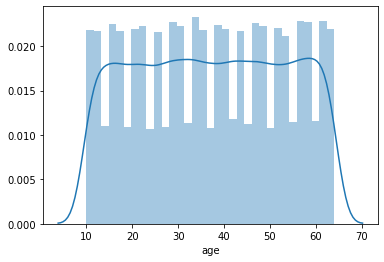

In [8]:
# distribution of age field

sns.distplot(df_train.age)

In [9]:
df_train.age.describe()

count    36992.000000
mean        37.118161
std         15.867412
min         10.000000
25%         23.000000
50%         37.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64

## Check of Nulls 

In [10]:
#train set
column = df_train.columns
for var in column:
    if df_train[var].isnull().sum()>0:
        print(var, ' has null values : ', df_train[var].isnull().sum(), 'and % of total is : ', df_train[var].isnull().sum()/len(df_train))

region_category  has null values :  5428 and % of total is :  0.14673442906574394
preferred_offer_types  has null values :  288 and % of total is :  0.007785467128027681
points_in_wallet  has null values :  3443 and % of total is :  0.09307417820069204


In [11]:
#test set
column_t = df_test.columns
for var in column_t:
    if df_test[var].isnull().sum()>0:
        print(var, ' has null values : ', df_test[var].isnull().sum(), 'and % of total is : ', df_test[var].isnull().sum()/len(df_test))

region_category  has null values :  2948 and % of total is :  0.14799939756011848
preferred_offer_types  has null values :  159 and % of total is :  0.007982328430142075
points_in_wallet  has null values :  1963 and % of total is :  0.09854912395200563


## Check of categorical values

In [12]:
#unique value count of categorical fields

cat_col = ['region_category','membership_category','joined_through_referral','preferred_offer_types', 'medium_of_operation', 'internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status', 'feedback'] 
for val in cat_col:
    print('\n', val)
    print(df_train[val].value_counts())


 region_category
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

 membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

 joined_through_referral
No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

 preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

 medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

 internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

 used_special_discount
Yes    20342
No     16650
Name: used_special_discount, dtype: int64

 offer_application_preference
Yes   

# Feature Transformation and Engineering

- Drop fields with high cardinality e.g. customer_id, Name, security_no fields
- Converts fields with yes no to 0,1 
- Convert fields with error values to legitimate values

In [13]:
#copy customer id of test data 

test_df_cus_id = df_test.customer_id

In [14]:
#Joined_through_referral field has saome rows marked with '?', so we'll check corresponding referral_id column has some
#significance id or not, if the field has significance value we'll replace it with yes otherwise no

df_train.joined_through_referral = np.where(((df_train.joined_through_referral=='?') & (df_train.referral_id=='xxxxxxxx')),'No',df_train.joined_through_referral)
df_train.joined_through_referral = np.where(((df_train.joined_through_referral=='?') & (df_train.referral_id!='xxxxxxxx')),'Yes',df_train.joined_through_referral)


df_test.joined_through_referral = np.where(((df_test.joined_through_referral=='?') & (df_test.referral_id=='xxxxxxxx')),'No',df_test.joined_through_referral)
df_test.joined_through_referral = np.where(((df_test.joined_through_referral=='?') & (df_test.referral_id!='xxxxxxxx')),'Yes',df_test.joined_through_referral)


In [15]:
#after imputation 

df_train.joined_through_referral.value_counts()

Yes    20592
No     16400
Name: joined_through_referral, dtype: int64

In [16]:
#Drop 'customer_id', 'Name', 'security_no' from train and test set

df_train = df_train.drop(['customer_id', 'Name', 'security_no','referral_id'],axis=1)
df_test = df_test.drop(['customer_id', 'Name', 'security_no','referral_id'],axis=1)

In [17]:
#Yes/No fields converted to 0 and 1

binary_dic={'Yes':1,'No':0}

df_train.joined_through_referral = df_train.joined_through_referral.map(binary_dic)
df_test.joined_through_referral = df_test.joined_through_referral.map(binary_dic)


df_train.used_special_discount = df_train.used_special_discount.map(binary_dic)
df_test.used_special_discount = df_test.used_special_discount.map(binary_dic)

df_train.offer_application_preference = df_train.offer_application_preference.map(binary_dic)
df_test.offer_application_preference = df_test.offer_application_preference.map(binary_dic)


df_train.past_complaint = df_train.past_complaint.map(binary_dic)
df_test.past_complaint = df_test.past_complaint.map(binary_dic)


In [18]:
df_train.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,0,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,1,1,0,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,1,0,1,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,0,1,1,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,0,1,1,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,0,1,1,Solved,Poor Website,5


### Null Treatment

In [19]:
df_train.points_in_wallet.describe()

count    33549.000000
mean       686.882199
std        194.063624
min       -760.661236
25%        616.150000
50%        697.620000
75%        763.950000
max       2069.069761
Name: points_in_wallet, dtype: float64

In [20]:
df_train.points_in_wallet.mode()

0    705.07
dtype: float64

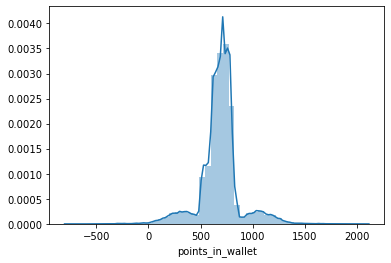

In [21]:
sns.distplot(df_train.points_in_wallet)

In [22]:
len(df_train[df_train['points_in_wallet']<0])

136

### 136 rows has -ve values

In [23]:
# df_train.region_category.ffill(inplace=True) Town
# df_test.region_category.ffill(inplace=True)

df_train.region_category.fillna('Town',inplace=True) #Repalced with most frequent value
df_test.region_category.fillna('Town',inplace=True)


df_train.preferred_offer_types.ffill(inplace=True) #random filling
df_test.preferred_offer_types.ffill(inplace=True)


df_train.points_in_wallet.fillna(value=687,inplace=True) #Repalced with mean value
df_test.points_in_wallet.fillna(value=687,inplace=True)

### Also, some fields has error values

In [24]:
len(df_train[df_train['avg_frequency_login_days']=='Error']) # no of rows with term 'Error'

3522

In [25]:
# value count of top frequencies of the field avg_frequency_login_days

df_train['avg_frequency_login_days'].value_counts().head()

Error    3522
13.0     1394
19.0     1365
8.0      1361
14.0     1355
Name: avg_frequency_login_days, dtype: int64

**The numerical field has 3522 record term as 'Error', other than that 13 is the most occured no, so for testing we are going to relace Error with 13**

In [26]:
## We are filling value of ERROR with 13 for now

df_train['avg_frequency_login_days'] =np.where(df_train['avg_frequency_login_days']=='Error',13,df_train['avg_frequency_login_days'])

df_test['avg_frequency_login_days'] =np.where(df_test['avg_frequency_login_days']=='Error',13,df_test['avg_frequency_login_days'])

In [27]:
#convert the datatye from object to float

df_train['avg_frequency_login_days']=df_train['avg_frequency_login_days'].astype('float64')
df_test['avg_frequency_login_days']=df_test['avg_frequency_login_days'].astype('float64')

---

In [28]:
len(df_train[df_train['days_since_last_login']==-999])

1999

1999 rows has -999 values for **days_since_last_login**

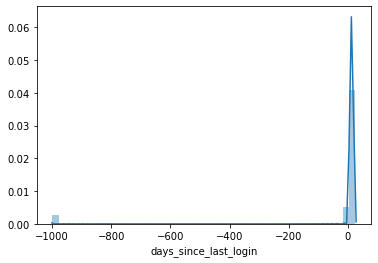

In [29]:
sns.distplot(df_train['days_since_last_login'])

In [30]:
#Other than -999 the field days_since_last_login has following statistics

df_train['days_since_last_login'][df_train['days_since_last_login']!=-999].describe()

count    34993.000000
mean        12.758552
std          5.572600
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         26.000000
Name: days_since_last_login, dtype: float64

In [31]:
#median value of the same.
df_train['days_since_last_login'][df_train['days_since_last_login']!=-999].median()

13.0

In [32]:
# we'll replace -999 with 13 or 0 and check

# df_train.days_since_last_login = np.where((df_train.days_since_last_login==-999),13,df_train.days_since_last_login)
# df_test.days_since_last_login = np.where((df_test.days_since_last_login==-999),13,df_test.days_since_last_login)

In [33]:
#taking absolute values in days_since_last_login

df_train['days_since_last_login']=abs(df_train['days_since_last_login'])
df_test['days_since_last_login']=abs(df_test['days_since_last_login'])


In [34]:
len(df_train[df_train['points_in_wallet']<0])

136

In [35]:
#taking absolute values in points_in_wallet

df_train['points_in_wallet']=abs(df_train['points_in_wallet'])
df_test['points_in_wallet']=abs(df_test['points_in_wallet'])



In [36]:
#taking absolute values in avg_time_spent

df_train['avg_time_spent']=abs(df_train['avg_time_spent'])
df_test['avg_time_spent']=abs(df_test['avg_time_spent'])


**medium_of_operation has a ? in data which we'll replace if corresponding internet_option is Mobile_Data then Smartphone else  Desktop**
- #before transformation value count
- Desktop       13913
- Smartphone    13876
- ?              5393
- Both           3810

In [37]:
df_train.medium_of_operation = np.where(((df_train.medium_of_operation=='?') & (df_train.internet_option=='Mobile_Data')),'Smartphone',df_train.medium_of_operation)
df_train.medium_of_operation = np.where(((df_train.medium_of_operation=='?') & (df_train.internet_option!='Mobile_Data')),'Desktop',df_train.medium_of_operation)


df_test.medium_of_operation = np.where(((df_test.medium_of_operation=='?') & (df_test.internet_option=='Mobile_Data')),'Smartphone',df_test.medium_of_operation)
df_test.medium_of_operation = np.where(((df_test.medium_of_operation=='?') & (df_test.internet_option!='Mobile_Data')),'Desktop',df_test.medium_of_operation)

In [38]:
#after transformation value count

df_train.medium_of_operation.value_counts()

Desktop       17457
Smartphone    15725
Both           3810
Name: medium_of_operation, dtype: int64

### churn_risk_score field has values -1,so we're taking absolute value to avoid -ve target variable which is unreal

In [39]:
df_train.churn_risk_score = abs(df_train.churn_risk_score)

In [40]:
### We are going to remove the rows where target variable is -ve

# df_train = df_train[df_train['churn_risk_score']>=0] #NOT WORKING

In [41]:
df_train.churn_risk_score.value_counts()

3    10424
4    10185
5     9827
1     3815
2     2741
Name: churn_risk_score, dtype: int64

- ### Creating dummy for categorical variable

In [42]:
dum_var = ['gender','region_category','membership_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback'] #feedback
    
for var in dum_var:
    df_train = pd.get_dummies(df_train,columns=[var])
    df_test = pd.get_dummies(df_test,columns=[var])

### Transform joining_date column to year,month  and week

In [43]:
df_train['joining_date'] = pd.to_datetime(df_train['joining_date'])
df_train['j_month'] = df_train['joining_date'].apply(lambda date:date.month)
df_train['j_year'] = df_train['joining_date'].apply(lambda date:date.year)
df_train['j_No_of_Week'] = df_train['joining_date'].apply(lambda date:date.week)

df_test['joining_date'] = pd.to_datetime(df_test['joining_date'])
df_test['j_month'] = df_test['joining_date'].apply(lambda date:date.month)
df_test['j_year'] = df_test['joining_date'].apply(lambda date:date.year)
df_test['j_No_of_Week'] = df_test['joining_date'].apply(lambda date:date.week)

### Droping unnecessary column

In [44]:
df_train = df_train.drop(['joining_date','last_visit_time'],axis=1) #'Temp_date' for temporary field
df_test = df_test.drop(['joining_date','last_visit_time'],axis=1)

In [45]:
df_train.shape

(36992, 49)

In [46]:
df_test.shape

(19919, 48)

---

## Preparing data for model building

In [47]:
#storing features for showing feature importance
feature = df_train.drop(['churn_risk_score'],axis=1).columns

In [48]:
#Divide the data into Feature and Label component

X = df_train.drop('churn_risk_score',axis=1)
y = df_train['churn_risk_score']

In [49]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
#test_value

df_test = scaler.transform(df_test)

## Apply Machine Learning Models for prediction

In [52]:
#import libraries for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report,f1_score #accuracy metrics

### Random Forest

In [53]:
# model_rf = RandomForestClassifier(random_state=0)
# model_rf.fit(X_train,y_train)
# pred_rf = model_rf.predict(X_test)
# print (classification_report(y_test,pred_rf))

In [54]:
# score = 100 * f1_score(y_test,pred_rf, average="macro")
# print(score)

In [55]:
#feature importance

# imp_feat=pd.Series(model_rf.feature_importances_,index=feature)
# plt.figure(figsize=(8,6))
# imp_feat.sort_values(ascending=False)[:10].plot(kind='bar')

### Catboost

In [56]:
from catboost import CatBoostClassifier
model_cgb = CatBoostClassifier(n_estimators=500,learning_rate=0.08, max_depth=6) #n_estimators=500,learning_rate=0.08, max_depth=6 -73.625
model_cgb.fit(X_train,y_train)
pred_cgb=model_cgb.predict(X_test)
print (classification_report(y_test,pred_cgb))
score = 100 * f1_score(y_test,pred_cgb, average="macro")
print(score)

0:	learn: 1.4895716	total: 328ms	remaining: 2m 43s
1:	learn: 1.3994541	total: 381ms	remaining: 1m 34s
2:	learn: 1.3113391	total: 430ms	remaining: 1m 11s
3:	learn: 1.2384333	total: 470ms	remaining: 58.3s
4:	learn: 1.1770794	total: 510ms	remaining: 50.4s
5:	learn: 1.1250658	total: 556ms	remaining: 45.8s
6:	learn: 1.0847838	total: 594ms	remaining: 41.8s
7:	learn: 1.0389681	total: 651ms	remaining: 40s
8:	learn: 0.9991897	total: 701ms	remaining: 38.3s
9:	learn: 0.9657073	total: 748ms	remaining: 36.6s
10:	learn: 0.9358474	total: 786ms	remaining: 34.9s
11:	learn: 0.9048377	total: 846ms	remaining: 34.4s
12:	learn: 0.8779169	total: 885ms	remaining: 33.2s
13:	learn: 0.8532382	total: 933ms	remaining: 32.4s
14:	learn: 0.8318534	total: 972ms	remaining: 31.4s
15:	learn: 0.8120675	total: 1.01s	remaining: 30.6s
16:	learn: 0.7920882	total: 1.07s	remaining: 30.6s
17:	learn: 0.7735351	total: 1.12s	remaining: 30.1s
18:	learn: 0.7579747	total: 1.16s	remaining: 29.4s
19:	learn: 0.7440101	total: 1.2s	remaini

161:	learn: 0.4694395	total: 7.99s	remaining: 16.7s
162:	learn: 0.4691744	total: 8.03s	remaining: 16.6s
163:	learn: 0.4688552	total: 8.12s	remaining: 16.6s
164:	learn: 0.4683066	total: 8.18s	remaining: 16.6s
165:	learn: 0.4675737	total: 8.24s	remaining: 16.6s
166:	learn: 0.4673118	total: 8.27s	remaining: 16.5s
167:	learn: 0.4668501	total: 8.32s	remaining: 16.4s
168:	learn: 0.4664654	total: 8.36s	remaining: 16.4s
169:	learn: 0.4659173	total: 8.41s	remaining: 16.3s
170:	learn: 0.4654704	total: 8.46s	remaining: 16.3s
171:	learn: 0.4652782	total: 8.5s	remaining: 16.2s
172:	learn: 0.4650306	total: 8.55s	remaining: 16.2s
173:	learn: 0.4647404	total: 8.6s	remaining: 16.1s
174:	learn: 0.4640558	total: 8.64s	remaining: 16.1s
175:	learn: 0.4638108	total: 8.69s	remaining: 16s
176:	learn: 0.4634739	total: 8.75s	remaining: 16s
177:	learn: 0.4631217	total: 8.79s	remaining: 15.9s
178:	learn: 0.4627923	total: 8.86s	remaining: 15.9s
179:	learn: 0.4625172	total: 8.9s	remaining: 15.8s
180:	learn: 0.46218

321:	learn: 0.4271446	total: 15.8s	remaining: 8.74s
322:	learn: 0.4269824	total: 15.9s	remaining: 8.69s
323:	learn: 0.4265720	total: 15.9s	remaining: 8.63s
324:	learn: 0.4263740	total: 15.9s	remaining: 8.59s
325:	learn: 0.4262155	total: 16s	remaining: 8.54s
326:	learn: 0.4259186	total: 16.1s	remaining: 8.5s
327:	learn: 0.4257599	total: 16.1s	remaining: 8.44s
328:	learn: 0.4255857	total: 16.2s	remaining: 8.4s
329:	learn: 0.4254181	total: 16.2s	remaining: 8.35s
330:	learn: 0.4251631	total: 16.3s	remaining: 8.3s
331:	learn: 0.4249275	total: 16.3s	remaining: 8.25s
332:	learn: 0.4246638	total: 16.4s	remaining: 8.2s
333:	learn: 0.4244571	total: 16.4s	remaining: 8.15s
334:	learn: 0.4242596	total: 16.4s	remaining: 8.09s
335:	learn: 0.4240726	total: 16.5s	remaining: 8.05s
336:	learn: 0.4237921	total: 16.5s	remaining: 7.99s
337:	learn: 0.4236167	total: 16.6s	remaining: 7.94s
338:	learn: 0.4234021	total: 16.6s	remaining: 7.89s
339:	learn: 0.4231639	total: 16.7s	remaining: 7.85s
340:	learn: 0.4230

481:	learn: 0.3961632	total: 23.5s	remaining: 878ms
482:	learn: 0.3959341	total: 23.6s	remaining: 830ms
483:	learn: 0.3957362	total: 23.6s	remaining: 781ms
484:	learn: 0.3955780	total: 23.7s	remaining: 733ms
485:	learn: 0.3954299	total: 23.8s	remaining: 684ms
486:	learn: 0.3953142	total: 23.8s	remaining: 636ms
487:	learn: 0.3950927	total: 23.9s	remaining: 587ms
488:	learn: 0.3949017	total: 23.9s	remaining: 539ms
489:	learn: 0.3947546	total: 24s	remaining: 490ms
490:	learn: 0.3946240	total: 24.1s	remaining: 441ms
491:	learn: 0.3944986	total: 24.1s	remaining: 392ms
492:	learn: 0.3943476	total: 24.2s	remaining: 343ms
493:	learn: 0.3941468	total: 24.2s	remaining: 294ms
494:	learn: 0.3939881	total: 24.3s	remaining: 245ms
495:	learn: 0.3938522	total: 24.3s	remaining: 196ms
496:	learn: 0.3936535	total: 24.4s	remaining: 147ms
497:	learn: 0.3935489	total: 24.4s	remaining: 98ms
498:	learn: 0.3933614	total: 24.5s	remaining: 49ms
499:	learn: 0.3932184	total: 24.5s	remaining: 0us
              prec

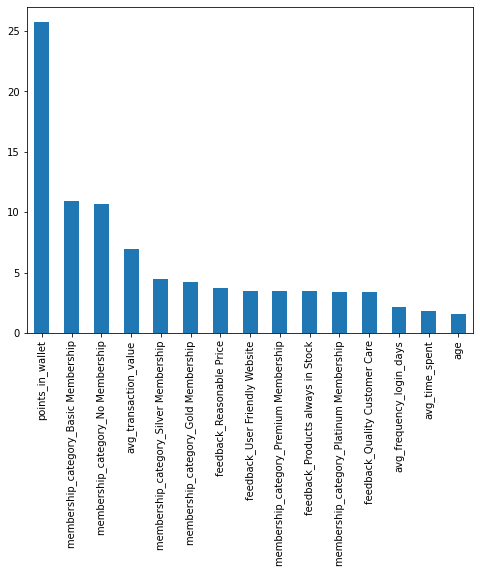

In [57]:
#feature importance

imp_feat=pd.Series(model_cgb.feature_importances_,index=feature)
plt.figure(figsize=(8,6))
imp_feat.sort_values(ascending=False)[:15].plot(kind='bar')

### XGBClassifier

In [58]:
# from xgboost import XGBClassifier
# model_xgb = XGBClassifier(n_estimators=500,learning_rate=0.08, max_depth=6,reg_lambda=2) #77.8386
# model_xgb.fit(X_train,y_train)
# pred_xgb=model_xgb.predict(X_test)
# print (classification_report(y_test,pred_xgb))
# score = 100 * f1_score(y_test,pred_xgb, average="macro")
# print(score)

### Predict the test set

In [59]:
#create a dataframe with final prediction of test set and ID 

# pred_final = model_xgb.predict(df_test)/
pred_final = model_cgb.predict(df_test).flatten()
final_df = pd.DataFrame({'customer_id':test_df_cus_id,'churn_risk_score':pred_final})

In [60]:
# final_df.head()
final_df.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


In [61]:
# convert the final dataframe into csv

# final_df.to_csv('Submission 1204.csv',index=False)